# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

### Preliminaries operations

In [1]:
#importing libraries
!unzip dependency_treebank.zip
!pip install simplejson
import simplejson as sj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict 
import zipfile
import os
import urllib.request
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from sklearn.manifold import TSNE
import random
from tqdm import tqdm #for progress bar
from scipy import spatial
import seaborn as sns
from keras.layers import Bidirectional
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from keras import backend as K
import tensorflow as tf
from sklearn.metrics import f1_score

unzip:  cannot find or open dependency_treebank.zip, dependency_treebank.zip.zip or dependency_treebank.zip.ZIP.
     |████████████████████████████████| 130 kB 29.8 MB/s 


   ### Importing Data
   We import Data from dependecy_treebank and we save it in a DataFrame that contains two column labels "word" where is collected each word, and in "class_id" where is collected each tag. 
   Then we show the Dataset.

In [2]:
list_word = []
list_class = []
data = []
train_ind: int
val_ind: int
for i in tqdm(range(1, 200)):
    if i<10:
        df = pd.read_table('/content/wsj_000{}.dp'.format(i), header = None)
    elif i>=10 and i<100:
        df = pd.read_table('/content/wsj_00{}.dp'.format(i), header = None)
    else:
        df = pd.read_table('/content/wsj_0{}.dp'.format(i), header = None)
    for j in range(0,df.shape[0]):
        list_word.append(df[0][j]) 
        list_class.append(df[1][j])
    if i==99:
        train_ind = len(list_word)
    elif i==149:
        val_ind = len(list_word)

data = list(zip(list_word,list_class))
df = pd.DataFrame(data, columns =['word', 'class_id'])

df.head(10)

100%|██████████| 199/199 [00:04<00:00, 41.73it/s]


,word,class_id
0,Pierre,NNP
1,Vinken,NNP
2,",",","
3,61,CD
4,years,NNS
5,old,JJ
6,",",","
7,will,MD
8,join,VB
9,the,DT


##Preprocessing

We've created the method df_cleaner that:

1.   Reset the index of the dataframe (due to the division of the dataset the Validation and Test set do NOT start with the correct index)

2.   Set lowercase all the words that are at the beginning of sentence and are not proper name, in     order to not have duplicate on the vocabulary (e.g. "the" and "The").

In [3]:
#setting lowercase
def df_cleaner(dataframe, label1,label2):
    dataframe = dataframe.reset_index()
    for i in range(0,dataframe.shape[0]-1):
        #punctuation removal
        if dataframe[label2][i] == '.' and dataframe[label2][i+1] != 'NNP':
            dataframe[label1][i+1] = str(dataframe[label1][i+1]).lower()
    return dataframe 


We've created the method df_cleaner_phrases that:

1.   Reset the index of the dataframe (due to the division of the dataset the Validation and Test set do NOT start with the correct index)

2.   Set lowercase all the words that are at the beginning of sentence and are not proper name, in     order to not have duplicate on the vocabulary (e.g. "the" and "The").

4. We divide the Dataset in phrases and we rename the labels in "phrase" instead of "word" and       "phrase_class_id" instead of "class_id



In [4]:
#setting lowercase and dividing the Dataframe by prhases
def df_cleaner_phrases(dataframe, label1,label2):
    dataframe = dataframe.reset_index()
    for i in range(0,dataframe.shape[0]-1):
        if dataframe[label2][i] == '.' and dataframe[label2][i+1] != 'NNP':
            dataframe[label1][i+1] = str(dataframe[label1][i+1]).lower()
  
    #phrase division
    phrase= []
    phrases=[]
    class_phrase= []
    class_phrases=[]
    for i in tqdm(range(0,len(dataframe))): 
        name = dataframe[label1][i]
        phrase.append(dataframe[label1][i])
        class_phrase.append(dataframe[label2][i]) 

        if name=='.' : 
            class_phrases.append(class_phrase)
            phrases.append(phrase)
            class_phrase = []
            phrase = []
    
    # phrase dataframe created
    data = list(zip(phrases,class_phrases))
    df_phrases = pd.DataFrame(data, columns =['phrase', 'phrase_class_id']) 

    return df_phrases 


In [5]:
#dataset composed by words and class_id divided in training, validation and test set
df_train = df[0:train_ind] 
df_val = df[train_ind:val_ind] 
df_test = df[val_ind::] 

#cleaning the whole dataframe
df_cleaned = df_cleaner(df,'word','class_id')

#dataset composed by word and class_id divided in training, validation and test set
df_train_cleaned = df_cleaner(df_train,'word','class_id')
df_val_cleaned = df_cleaner(df_val,'word','class_id')
df_test_cleaned = df_cleaner(df_test,'word','class_id')

#cleaning the whole dataframe phrases
df_phrases = df_cleaner_phrases(df,'word','class_id')

#dataset composed by phrase and phrase_class_id divided in training, validation and test set
df_phrases_train = df_cleaner_phrases(df_train,'word','class_id')
df_phrases_val = df_cleaner_phrases(df_val,'word','class_id')
df_phrases_test = df_cleaner_phrases(df_test,'word','class_id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 15709/15709 [00:00<00:00, 42820.49it/s]


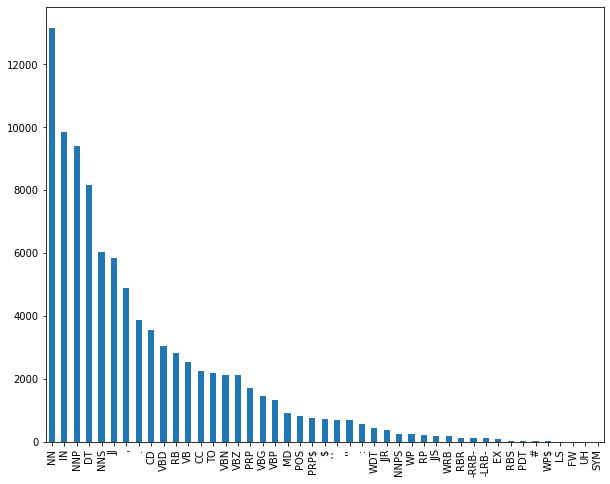

In [6]:
#Plotting the quantity of the classes
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_cleaned["class_id"].value_counts().plot.bar()

In [7]:
#showing the training set divided in phrases 
df_phrases.head(10)

,phrase,phrase_class_id
0,"[Pierre, Vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,"[Rudolph, Agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
5,"[Lorillard, Inc., ,, the, unit, of, New, York-...","[NNP, NNP, ,, DT, NN, IN, JJ, JJ, NNP, NNP, WD..."
6,"[although, preliminary, findings, were, report...","[IN, JJ, NNS, VBD, VBN, RBR, IN, DT, NN, IN, ,..."
7,"[a, Lorillard, spokewoman, said, ,, ``, This, ...","[DT, NNP, NN, VBD, ,, ``, DT, VBZ, DT, JJ, NN, .]"
8,"[we, 're, talking, about, years, ago, before, ...","[PRP, VBP, VBG, IN, NNS, IN, IN, NN, VBD, IN, ..."
9,"[there, is, no, asbestos, in, our, products, n...","[EX, VBZ, DT, NN, IN, PRP$, NNS, RB, .]"


## Dataframes's tokenization

We created the method tokenization that tokenize taking in input that dataframe and returns phrases,classes_id, tokenizer_phrase and tokenizer_class_id

In [6]:
#tokenization 
def tokenization(df_phrases_divided):
  tokenizer_phrase = Tokenizer()
  tokenizer_class_id=Tokenizer()

  tokenizer_phrase.fit_on_texts(df_phrases["phrase"])
  tokenizer_class_id.fit_on_texts(df_phrases["phrase_class_id"])

  X_encoded = tokenizer_phrase.texts_to_sequences(df_phrases_divided["phrase"])

  y_encoded = tokenizer_class_id.texts_to_sequences(df_phrases_divided["phrase_class_id"])

  print("** Raw data point **", "\n", "-"*100, "\n") 
  print('X: ', df_phrases_divided["phrase"][0], '\n') 
  print('Y: ', df_phrases_divided["phrase_class_id"][0], '\n') 
  print() 
  print("** Encoded data point **", "\n", "-"*100, "\n") 
  print('X: ', X_encoded[0], '\n') 
  print('Y: ', y_encoded[0], '\n')
  print(len(X_encoded))
  print(len(y_encoded))
  print(df_phrases.shape)

  return X_encoded, y_encoded, tokenizer_phrase, tokenizer_class_id

In [7]:
#tokenization of the training set
X_encoded_train,y_encoded_train,tokenizer_phrase_train,tokenizer_class_id_train = tokenization(df_phrases_train)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

Y:  ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8] 

1896
1896
(3828, 2)


In [8]:
#tokenization of the validation set
X_encoded_val,y_encoded_val,tokenizer_phrase_val,tokenizer_class_id_val = tokenization(df_phrases_val)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['For', 'six', 'years', ',', 'T.', 'Marshall', 'Hahn', 'Jr.', 'has', 'made', 'corporate', 'acquisitions', 'in', 'the', 'George', 'Bush', 'mode', ':', 'kind', 'and', 'gentle', '.'] 

Y:  ['IN', 'CD', 'NNS', ',', 'NNP', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NNS', 'IN', 'DT', 'NNP', 'NNP', 'NN', ':', 'JJ', 'CC', 'JJ', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [10, 332, 78, 1, 1037, 1880, 556, 977, 31, 169, 328, 1214, 7, 2, 2118, 226, 8268, 67, 799, 8, 8269, 3] 

Y:  [2, 9, 5, 7, 3, 3, 3, 3, 16, 15, 6, 5, 2, 4, 3, 3, 1, 26, 6, 13, 6, 8] 

1287
1287
(3828, 2)


In [9]:
#tokenization of the test set
X_encoded_test,y_encoded_test,tokenizer_phrase_test, tokenizer_class_id_test = tokenization(df_phrases_test)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['A.L.', 'Williams', 'Corp.', 'was', 'merged', 'into', 'Primerica', 'Corp.', ',', 'New', 'York', ',', 'after', 'a', 'special', 'meeting', 'of', 'Williams', 'shareholders', 'cleared', 'the', 'transaction', ',', 'the', 'companies', 'said', '.'] 

Y:  ['NNP', 'NNP', 'NNP', 'VBD', 'VBN', 'IN', 'NNP', 'NNP', ',', 'NNP', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', 'IN', 'NNP', 'NNS', 'VBD', 'DT', 'NN', ',', 'DT', 'NNS', 'VBD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5305, 1216, 76, 28, 4330, 103, 2869, 76, 1, 33, 85, 1, 100, 6, 761, 703, 4, 1216, 563, 10080, 2, 564, 1, 2, 146, 16, 3] 

Y:  [3, 3, 3, 10, 15, 2, 3, 3, 7, 3, 3, 7, 2, 4, 6, 1, 2, 3, 5, 10, 4, 1, 7, 4, 5, 10, 8] 

645
645
(3828, 2)


In [10]:
#tokenization of ALL DATA
X_encoded,y_encoded,tokenizer_phrase,tokenizer_class_id = tokenization(df_phrases)
X_decoded = tokenizer_phrase.sequences_to_texts(X_encoded)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

Y:  ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8] 

3828
3828
(3828, 2)


In [11]:
#We check that each sequence of input and output is same length 
 
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded_train, y_encoded_train)] 
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


# Padding the dataframe

We created the method longest_sentence to check the longest sentence in the dataframe

In [12]:
#PADDING
# check length of longest sentence
def longest_sentence(X_encoded):
  lengths = [len(seq) for seq in X_encoded] 
  print("Length of longest sentence: {}".format(max(lengths))) 
  sns.boxplot(lengths) 
  plt.show()
  return max(lengths)

We can see in the plot that there are many outliers as the longest sentence that contains 250 words and others sentences that contains from 50 to 120 words.

Length of longest sentence: 250


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


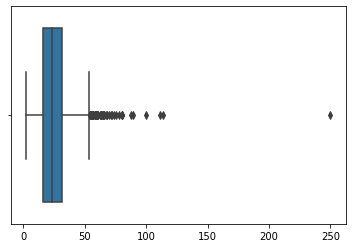

250

In [13]:
longest_sentence(X_encoded)

In [14]:
#Found the longest sentence in the training set
MAX_SEQUENCE = 50

We created the method padding to create the padding of the dataframe with the correct length

In [15]:
#PADDING pad_sequences
def padding(X_encoded, y_encoded, MAX_SEQ_LENGTH):
  X_padded = pad_sequences(X_encoded,MAX_SEQ_LENGTH)
  y_padded = pad_sequences(y_encoded,MAX_SEQ_LENGTH)
  return X_padded, y_padded


In [16]:
#padding creation for the training set
X_padded_train, y_padded_train = padding(X_encoded_train, y_encoded_train, MAX_SEQUENCE)

In [17]:
#padding creation for the validation set
X_padded_val, y_padded_val = padding(X_encoded_val, y_encoded_val,  MAX_SEQUENCE)

In [18]:
#padding creation for the training set
X_padded_test,y_padded_testt = padding(X_encoded_test,y_encoded_test,  MAX_SEQUENCE)

In [19]:
#padding creation for all data set
X_padded,y_padded = padding(X_encoded,y_encoded, MAX_SEQUENCE)

In [20]:
#we show a word's padding of the training set
print(X_padded_train[0], "\n"*3) 
print(y_padded_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 5419 3714    1 2005   78  316    1   39 2383    2
  122   22    6 2006  317  444 2007    3] 



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3  3  7  9  5  6  7 20 12  4  1  2  4  6  1  3
  9  8]


Adding the padding to tokenizers

In [21]:
tokenizer_class_id.word_index['0']= 0
tokenizer_class_id.index_word[0]='0'
tokenizer_class_id_test.word_index['0']= 0
tokenizer_class_id_val.word_index['0']= 0
tokenizer_class_id_train.word_index['0']= 0

tokenizer_phrase.word_index['0']= 0
tokenizer_phrase_test.word_index['0']= 0
tokenizer_phrase_val.word_index['0']=0
tokenizer_phrase_train.word_index['0']= 0


 ##  GloVe 
 We start downloading GloVe

In [22]:
url = "https://nlp.stanford.edu/data/glove.6B.zip"

glove_path = os.path.join(os.getcwd(),"Glove")
glove_zip = os.path.join(os.getcwd(),"Glove", "glove.6B.zip")

if not os.path.exists(glove_path):
    os.makedirs(glove_path)

if not os.path.exists(glove_zip):
    urllib.request.urlretrieve(url, glove_zip)
    print("Successful download")

with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
    zip_ref.extractall(path=glove_path)
    print("Successful extraction")

Successful download
Successful extraction


#Embeddings' creation

In [23]:
#size of the vocabularies 
EMBEDDING_SIZE  = 50  # dimensions of the features of GloVe 
VOCABULARY_SIZE_TRAIN = len(tokenizer_phrase_train.word_index) + 1 
VOCABULARY_SIZE_VAL = len(tokenizer_phrase_val.word_index) + 1 
VOCABULARY_SIZE_TEST = len(tokenizer_phrase_test.word_index) + 1 

VOCABULARY_SIZE = len(tokenizer_phrase.word_index) + 1 

# create an empty embedding matix 
embedding_weights_train = np.zeros((VOCABULARY_SIZE_TRAIN, EMBEDDING_SIZE)) 
embedding_weights_val = np.zeros((VOCABULARY_SIZE_VAL, EMBEDDING_SIZE)) 
embedding_weights_test = np.zeros((VOCABULARY_SIZE_TEST, EMBEDDING_SIZE)) 

embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE)) 


# create a word to index dictionary mapping 
word2id_train = tokenizer_phrase_train.word_index
word2id_val= tokenizer_phrase_val.word_index
word2id_test = tokenizer_phrase_test.word_index

word2id = tokenizer_phrase.word_index

Now we create the vocabulary of GloVe V1



In [24]:
V1 = {}
glove_path = '/content/Glove'
with open(glove_path + '/glove.6B.{}d.txt'.format(EMBEDDING_SIZE),'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],'float32')
        V1[word]=vector
        
print("Found %s word vectors." % len(V1))

Found 400000 word vectors.


We created the method OOV_terms that creates the out of vocabulary



In [25]:
def OOV_terms(embedding_model, word_listing):
    embedding_vocabulary = set(embedding_model)
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [26]:
#Generation of all vocabularies and out of vocabularies
OOV1 = OOV_terms(V1.keys(), np.sort(df_train_cleaned['word'].unique()))

V2= list(V1)+OOV1

OOV2 = OOV_terms(V2, np.sort(df_val_cleaned['word'].unique()))
V3= list(V2)+OOV2

OOV3 = OOV_terms(V3, np.sort(df_test_cleaned['word'].unique()))
V4= list(V3)+OOV3

In [27]:
print("Total OOV1 terms: {0} ({1:.2f}%)".format(len(OOV1), float(len(OOV1))*100 / len(df_train['word'].unique())))
print("Total OOV2 terms: {0} ({1:.2f}%)".format(len(OOV2), float(len(OOV2))*100 / len(df_val['word'].unique())))
print("Total OOV3 terms: {0} ({1:.2f}%)".format(len(OOV3), float(len(OOV3))*100 / len(df_test['word'].unique())))

print(len(V2))

Total OOV1 terms: 2136 (27.03%)
Total OOV2 terms: 864 (14.38%)
Total OOV3 terms: 426 (11.70%)
402136


Computing embeddings with the method compute_embedding

In [28]:
#We created this method to generate all the embeddings that we need
#It checks if a word exists in the vocabulary, in that case tries to adds the corresponding features of V1(if they exist), else adds random features of V1
#Then it returns the embedding
def compute_embedding(word2id, vocabulary,embedding_weights):
  for word, index in tqdm(word2id.items()):
    if word in vocabulary:
      try: 
        embedding_weights[index, :] = V1[word] 
      except KeyError:
          embedding_weights[index, :] = np.random.uniform(random.choice(list(V1.values())))
          pass
  return embedding_weights

In [29]:
embedding_V2 = compute_embedding(word2id_train,V2,embedding_weights_train)
embedding_V3 = compute_embedding(word2id_val, V3, embedding_weights_val) 
embedding_V4 = compute_embedding(word2id_test, V4, embedding_weights_test)

100%|██████████| 10948/10948 [00:27<00:00, 395.53it/s]


In [30]:
y_padded = to_categorical(y_padded)

In [41]:
#we divide y_padded in train validation and test
y_padded_train = y_padded[0:1896]
y_padded_val = y_padded[1896:3183]
y_padded_test = y_padded[3183:]

#Plotting methods
We created three methods to plot the accuracy, real accuracy and loss of the model

In [42]:
# visualizing the accuracy and real accuracy of the training set
def plot_accuracy(model_fitted,name):
  plt.plot(model_fitted.history['accuracy'])
  plt.plot(model_fitted.history['real_accuracy'])
  plt.title(name)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Real Training Accuracy'], loc="lower right")
  plt.show()

In [34]:
# visualizing the real accuracy
def plot_accuracy_real(model_fitted,name):
  plt.plot(model_fitted.history['real_accuracy'])
  plt.plot(model_fitted.history['val_real_accuracy'])
  plt.title(name)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Real Training Accuracy','Real Validation Accuracy'], loc="lower right")
  plt.show()

In [35]:
#Visualizing the loss of training and validation set
def plot_loss(model_fitted,name):
  plt.plot(model_fitted.history['loss'])
  plt.plot(model_fitted.history['val_loss'])
  plt.title(name)
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'], loc="upper right")
  plt.show()

#Method for custom Accuracy
With this method we ignore the padding and the punctuation from the accuracy.



1.  We create a mask comparing all the True Labels with a list containing the classes that we don't want to evaluate.   are 0 the others are 1. We update the mask for each value that we want to ignore doing an Exlusive NOR in order to preserve all the previous 0.
2.  Then we create matches tensor that first of all checks all the equal occurences between predicted values and true values are equal. Sequently we multiply it with the mask, so we have the all correct matches.
3.  We compute the accuracy, just checking how many correct matches and how many values we had to predict.

Example:

True Values = [0,0,0,0,1,2,3,4,8] 

Predicted Values = [0,0,0,0,1,2,2,4,9] 

Values to be ignored = [0,8] 

1. The mask will be equal to [0,0,0,0,1,1,1,1,0] because we want to ignore 0 and 8 
2. Matches will be equal to [1,1,1,1,1,1,0,1,0] then we compute the matches with the mask and we obtain [0,0,0,0,1,1,0,1,0]
3. We compute the accuracy dividing the sum of the matches that is 3 over the sum of mask that is 4. The accuracy is 75%



In [36]:
def ignore_class_accuracy():
    def real_accuracy(y_true, y_pred):
        y_true_class = tf.argmax(y_true, axis=-1)
        y_pred_class = tf.argmax(y_pred, axis=-1)
        to_ignore = [0,7,8,23,24,25,26,40] #'0': 0,',': 7, '.': 8,'$': 23, '``': 24, "''": 25, ':': 26,'#': 40
        ignore_mask = np.ones((y_true_class.shape)) 
        for i in range(0,len(to_ignore)):
          ignore_mask = np.logical_not(np.logical_xor(ignore_mask, K.cast(K.not_equal(y_true_class, to_ignore[i]), 'int32')))
        ignore_mask = tf.convert_to_tensor(ignore_mask,dtype='int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return real_accuracy

#Method for F1 Score
For each epoch we compute the f1 score only for the classes that are not puctuation, symbols or padding, for training and validation set.


In [37]:
from sklearn import metrics
def f1_score_():
  def f1_score_real(y_true,y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    y_true_ = y_true.numpy()
    y_pred_ = y_pred.numpy()
    #calculate F1 score
    f1 = metrics.f1_score(y_true_.flatten(), y_pred_.flatten(), labels=[1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45], average='micro')
    return f1
  return f1_score_real

#LSTM Neural Network

In [43]:
#Creation LSTM model with custom accuracy
NUM_CLASSES = y_padded.shape[2]
lstm_model_acc = Sequential()
lstm_model_acc.add(Embedding(input_dim    = VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                        output_dim        = EMBEDDING_SIZE,          # length of vector with which each word is represented
                        input_length      = MAX_SEQUENCE,            # length of input sequence
                        weights           = [embedding_V4],          # word embedding matrix
                        trainable         = False                    # False - not update embeddings_weight matrix
))
lstm_model_acc.add(Bidirectional(LSTM(128, return_sequences=True),input_shape=(46, 1)))
lstm_model_acc.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
lstm_model_acc.compile(loss     =  'categorical_crossentropy',
                  optimizer     =  'adam',
                  metrics       =  ['accuracy',ignore_class_accuracy(),f1_score_()],
                  run_eagerly   =   True)
lstm_model_acc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            547450    
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 256)          183296    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 50, 46)           11822     
 tributed)                                                       
                                                                 
Total params: 742,568
Trainable params: 195,118
Non-trainable params: 547,450
_________________________________________________________________


In [44]:
#Fitting the LSTM model with custom accuracy
lstm_acc = lstm_model_acc.fit(X_padded, y_padded, batch_size=16, epochs=40,validation_data=(X_padded_val,y_padded_val))

Epoch 1/40
240/240 [==============================] - 118s 493ms/step - loss: 1.0034 - accuracy: 0.7378 - real_accuracy: 0.4426 - f1_score_real: 0.4424 - val_loss: 0.5520 - val_accuracy: 0.8563 - val_real_accuracy: 0.6728 - val_f1_score_real: 0.6734
Epoch 2/40
240/240 [==============================] - 113s 469ms/step - loss: 0.4334 - accuracy: 0.8814 - real_accuracy: 0.7252 - f1_score_real: 0.7257 - val_loss: 0.3736 - val_accuracy: 0.8933 - val_real_accuracy: 0.7565 - val_f1_score_real: 0.7567
Epoch 3/40
240/240 [==============================] - 113s 473ms/step - loss: 0.3307 - accuracy: 0.9057 - real_accuracy: 0.7807 - f1_score_real: 0.7809 - val_loss: 0.3048 - val_accuracy: 0.9118 - val_real_accuracy: 0.7984 - val_f1_score_real: 0.7982
Epoch 4/40
240/240 [==============================] - 114s 474ms/step - loss: 0.2814 - accuracy: 0.9186 - real_accuracy: 0.8101 - f1_score_real: 0.8101 - val_loss: 0.2640 - val_accuracy: 0.9234 - val_real_accuracy: 0.8246 - val_f1_score_real: 0.8245


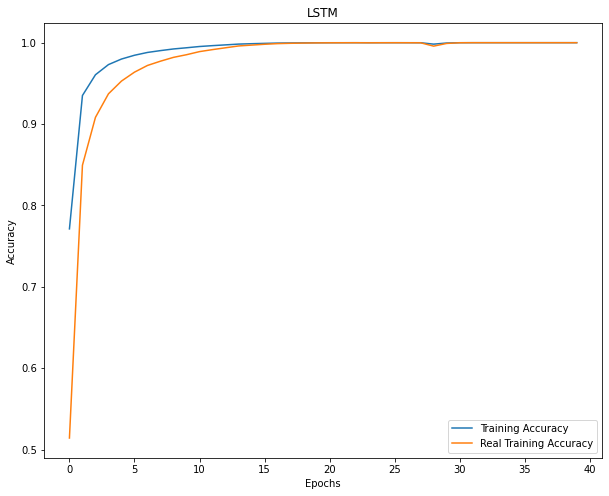

In [45]:
#Plotting the LSTM model's accuracy and real accuracy of training set
plot_accuracy(lstm_acc, "LSTM")

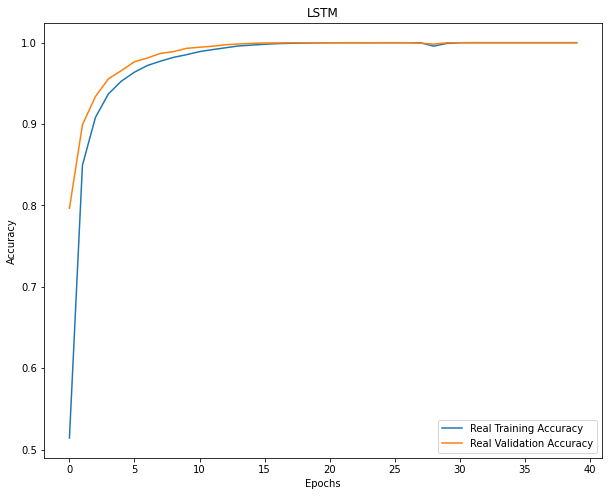

In [46]:
#Plotting the LSTM model's real accuracy of training set and validation set
plot_accuracy_real(lstm_acc,"LSTM")

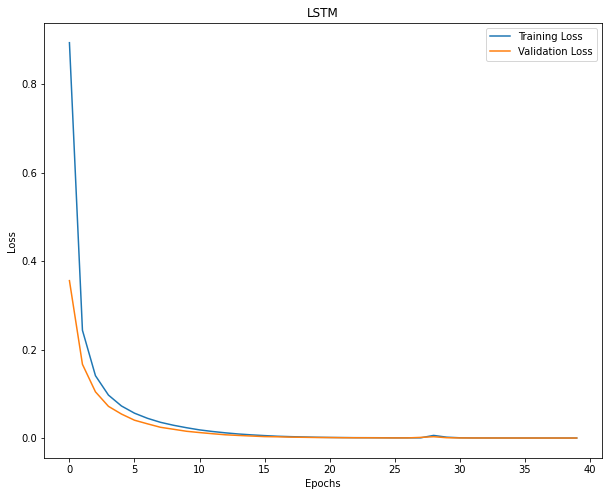

In [47]:
#Plotting the LSTM model loss
plot_loss(lstm_acc,"LSTM")

#GRU Neural Network

In [48]:
#model creation
NUM_CLASSES = y_padded.shape[2]
gru_model_acc = Sequential()
gru_model_acc.add(Embedding(input_dim     = VOCABULARY_SIZE,
                        output_dim        = EMBEDDING_SIZE,
                        input_length      = MAX_SEQUENCE,
                        weights           = [embedding_V4],
                        trainable         = False
))
gru_model_acc.add(GRU(128, return_sequences=True))
gru_model_acc.add(LSTM(64, return_sequences=True))
gru_model_acc.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
gru_model_acc.compile(loss          = 'categorical_crossentropy',
                      optimizer     = 'adam',
                      metrics       = ['accuracy', ignore_class_accuracy(), f1_score_()],
                      run_eagerly   =   True)
gru_model_acc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            547450    
                                                                 
 gru (GRU)                   (None, 50, 128)           69120     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            49408     
                                                                 
 time_distributed_1 (TimeDis  (None, 50, 46)           2990      
 tributed)                                                       
                                                                 
Total params: 668,968
Trainable params: 121,518
Non-trainable params: 547,450
_________________________________________________________________


In [49]:
#Fitting the model
gru_acc = gru_model_acc.fit(X_padded, y_padded, batch_size=16, epochs=50,validation_data=(X_padded_val,y_padded_val))

Epoch 1/50
240/240 [==============================] - 60s 249ms/step - loss: 1.3137 - accuracy: 0.6572 - real_accuracy: 0.3074 - f1_score_real: 0.3002 - val_loss: 0.8443 - val_accuracy: 0.7657 - val_real_accuracy: 0.5063 - val_f1_score_real: 0.4998
Epoch 2/50
240/240 [==============================] - 49s 206ms/step - loss: 0.6088 - accuracy: 0.8401 - real_accuracy: 0.6418 - f1_score_real: 0.6407 - val_loss: 0.4899 - val_accuracy: 0.8699 - val_real_accuracy: 0.7061 - val_f1_score_real: 0.7066
Epoch 3/50
240/240 [==============================] - 49s 204ms/step - loss: 0.4112 - accuracy: 0.8893 - real_accuracy: 0.7433 - f1_score_real: 0.7437 - val_loss: 0.3704 - val_accuracy: 0.8986 - val_real_accuracy: 0.7682 - val_f1_score_real: 0.7683
Epoch 4/50
240/240 [==============================] - 59s 247ms/step - loss: 0.3266 - accuracy: 0.9096 - real_accuracy: 0.7893 - f1_score_real: 0.7894 - val_loss: 0.3028 - val_accuracy: 0.9157 - val_real_accuracy: 0.8068 - val_f1_score_real: 0.8066
Epoc

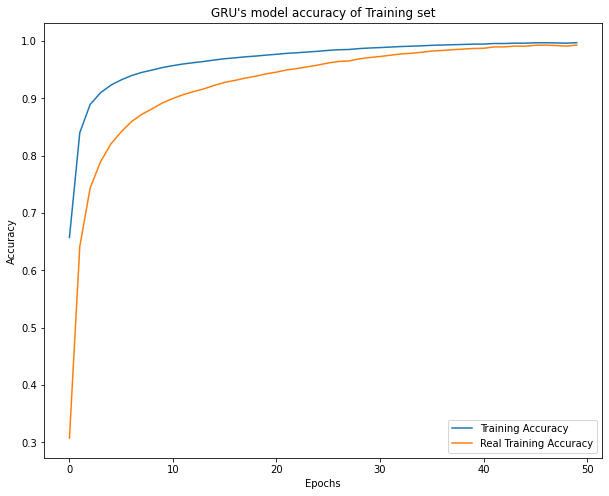

In [50]:
#Plotting GRU model's accuracy and real accuracy of the training set
plot_accuracy(gru_acc, "GRU's model accuracy of Training set")

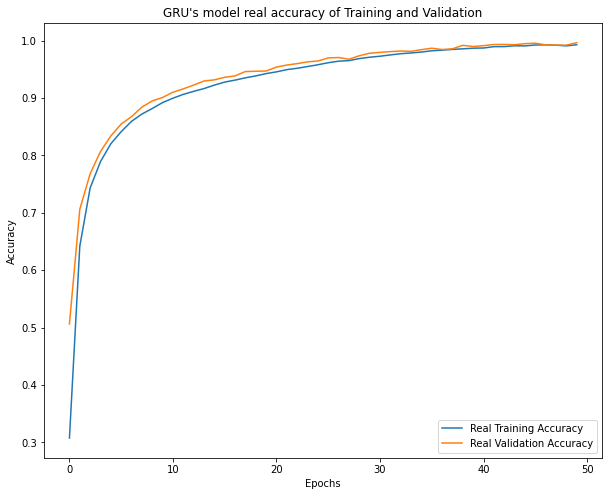

In [51]:
#Plotting GRU model's real accuracy of training set and validation set
plot_accuracy_real(gru_acc,"GRU's model real accuracy of Training and Validation")

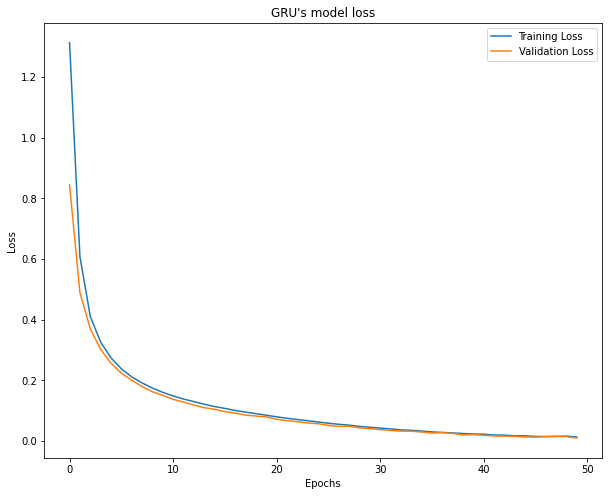

In [52]:
#Plotting GRU model's loss
plot_loss(gru_acc,"GRU's model loss")

#Models' Evaluation

The results on the test sets are coherent with those on the validation set, in fact the validation's accuracy is around 99% and the accuracy on the test set is 100%

In [53]:
#LSTM model evaluation
loss, accuracy, real_accuracy,f1_score = lstm_model_acc.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1},\nReal_accuracy: {2},\nF1_score: {3}".format(loss, accuracy, real_accuracy,f1_score))

21/21 [==============================] - 3s 146ms/step - loss: 5.9067e-05 - accuracy: 1.0000 - real_accuracy: 1.0000 - f1_score_real: 1.0000
Loss: 5.9066533140139654e-05,
Accuracy: 1.0,
Real_accuracy: 1.0,
F1_score: 1.0


The results on the test sets are coherent with those on the validation set, in fact the validation's accuracy is around 99% and the accuracy on the test set is around 99%

In [54]:
loss, accuracy, real_accuracy,f1_score = gru_model_acc.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1},\nReal_accuracy: {2},\nF1_score: {3}".format(loss, accuracy, real_accuracy, f1_score))

21/21 [==============================] - 3s 145ms/step - loss: 0.0091 - accuracy: 0.9987 - real_accuracy: 0.9970 - f1_score_real: 0.9970
Loss: 0.009069996885955334,
Accuracy: 0.9986666440963745,
Real_accuracy: 0.9969719648361206,
F1_score: 0.9969719648361206


#Error Analisys

###Showing Predictions

In [55]:
def prediction(model):
  predictions = model.predict(X_padded_test)
  return predictions

In [56]:
def logits_to_tokens(sequences, dict):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(dict[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [57]:
def unpadding(test):
  l=[]
  for i in range(0,len(test)):
    l.append(list(filter(lambda x: x != '0' and x!='$' and x!='.' and x!=',' and x!='%' and x!=':' and x!='``' and x!= "''", test[i])))
  return l

In [58]:
#prediction of lstm model
predictions_lstm = prediction(lstm_model_acc)

In [59]:
#prediction of gru model
predictions_gru = prediction(gru_model_acc)

In [60]:
#digit to tokens lstm model
dict_class_id = dict(tokenizer_class_id.index_word)
predictions_lstm_detokenized = logits_to_tokens(predictions_lstm, dict_class_id)
true = logits_to_tokens(y_padded_test, dict_class_id)

In [61]:
#digit to tokens gru model
predictions_gru_detokenized = logits_to_tokens(predictions_gru, dict_class_id)

In [62]:
def showing_predictions(pred, true):
  pre = np.array(unpadding(pred),dtype=list)
  true = np.array(unpadding(true), dtype=list)
  
  #to show the wrong labels
  for i in range(0,len(pre)):
    for j in range(0,len(pre[i])):
      if pre[i][j] != true[i][j]:
        print(pre[i])
        print(true[i])
        print(df_phrases_test['phrase'][i])

Here we show all the wrong prediction of the LSTM model, we can see that is coherent, because in all the test set there NO wrong label

In [63]:
#showing predictions lstm model
showing_predictions(predictions_lstm_detokenized,true)

Here we show all the wrong prediction of the GRU model, we can see that is coherent, because in all the test set there some classification errors, expecially for the labels "adjective", "noun" and "proper noun". 

---



In [64]:
#showing predictions gru model
showing_predictions(predictions_gru_detokenized,true)

['nn', 'nns', 'vbd', 'cd', 'nn', 'in', 'dt', 'nn', 'cc', 'cd', 'nn', 'in', 'dt', 'nn', 'rb', 'jj', 'to', 'jjr', 'nn', 'nn', 'nn', 'dt', 'jj', 'in', 'dt', 'nns', 'vbd', 'rp', 'in', 'nnp', 'cd']
['nn', 'nns', 'vbd', 'cd', 'nn', 'in', 'dt', 'nn', 'cc', 'cd', 'nn', 'in', 'dt', 'nn', 'rb', 'jj', 'to', 'jjr', 'nn', 'nn', 'nn', 'dt', 'jj', 'in', 'dt', 'nns', 'vbd', 'in', 'in', 'nnp', 'cd']
['aerospace', 'earnings', 'sagged', '37', '%', 'for', 'the', 'quarter', 'and', '15', '%', 'for', 'the', 'year', ',', 'largely', 'due', 'to', 'lower', 'B-1B', 'program', 'profit', ';', 'the', 'last', 'of', 'the', 'bombers', 'rolled', 'out', 'in', 'April', '1988', '.']
['jj', 'nn', 'nns', 'in', 'nns', 'vbg', 'dt', 'nnp', 'cd', 'cc', 'cd', 'nns', 'wdt', 'dt', 'nnp', 'nns', 'vbp', 'rb', 'vbp', 'vbn', 'vbg', 'rp', 'in', 'nn', 'nns', 'vbp', 'vbn']
['jj', 'nn', 'nns', 'in', 'nns', 'vbg', 'dt', 'nnp', 'cd', 'cc', 'cd', 'nns', 'wdt', 'dt', 'nnp', 'nns', 'vbp', 'rb', 'vbp', 'vbn', 'vbg', 'in', 'in', 'nn', 'nns', 'vbp

###Confusion Matrix


We created the methos plot_cm to plot the confusion matrix for the models

In [65]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  labels_tot=['0','nn','in','nnp','dt','nns','jj',',','.','cd',
                'vbd','rb', 'vb', 'cc', 'to', 'vbn', 'vbz', 'prp', 
                'vbg', 'vbp', 'md', 'pos', 'prp$', '$', '``', "''", 
                ':', 'wdt', 'jjr', 'nnps', 'wp', 'rp', 'jjs', 'wrb', 
                'rbr', '-rrb-', '-lrb-', 'ex', 'rbs', 'pdt', 'wp$']
  eq = 0
  not_eq = 0
  zeros = 0
  cm = confusion_matrix(labels, predictions)
  fig = plt.figure(figsize=(18,15))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt="d", ax=ax)
  ax.set_title('Confusion matrix')
  ax.set_ylabel('Actual label')
  ax.set_xlabel('Predicted label')
  ax.xaxis.set_ticklabels(labels_tot); 
  ax.yaxis.set_ticklabels(labels_tot);
  
  for i in range(0,len(cm)-1):
    for j in range(0,len(cm[i])):
      if not cm[i][j] == 0 and i == j:
        eq += cm[i][j]
        if i==0 and j==0:
          zeros += cm[i][j]
        elif i==7 and j==7:
          zeros += cm[i][j]
        elif i==8 and j==8:
          zeros += cm[i][j]
        elif i==23 and j==23:
          zeros += cm[i][j]
        elif i==24 and j==24: 
          zeros += cm[i][j]
        elif i==25 and j==25:
          zeros += cm[i][j]
        elif i==26 and j==26: 
          zeros += cm[i][j]
        elif i==40 and j==40: 
          zeros += cm[i][j]        
      elif not cm[i][j] == 0 and i!=j:
        not_eq += cm[i][j]
  eq_true = eq - zeros
  
  print('Correct Labels: ' , eq)
  print('Sentence length: ',(eq + not_eq)-zeros )
  print('Correct Labels (without padding,symbols,punctuation): ', eq_true)
  print('Wrong Labels: ', not_eq)
  print('Padding,symbols,punctuation:', zeros)


We can see that the predictions on the test set in LSTM model are very precise, in fact, there are no incorrected labels (over 13777 total words). 

Correct Labels:  32246
Sentence length:  13777
Correct Labels (without padding,symbols,punctuation):  13777
Wrong Labels:  0
Padding,symbols,punctuation: 18469


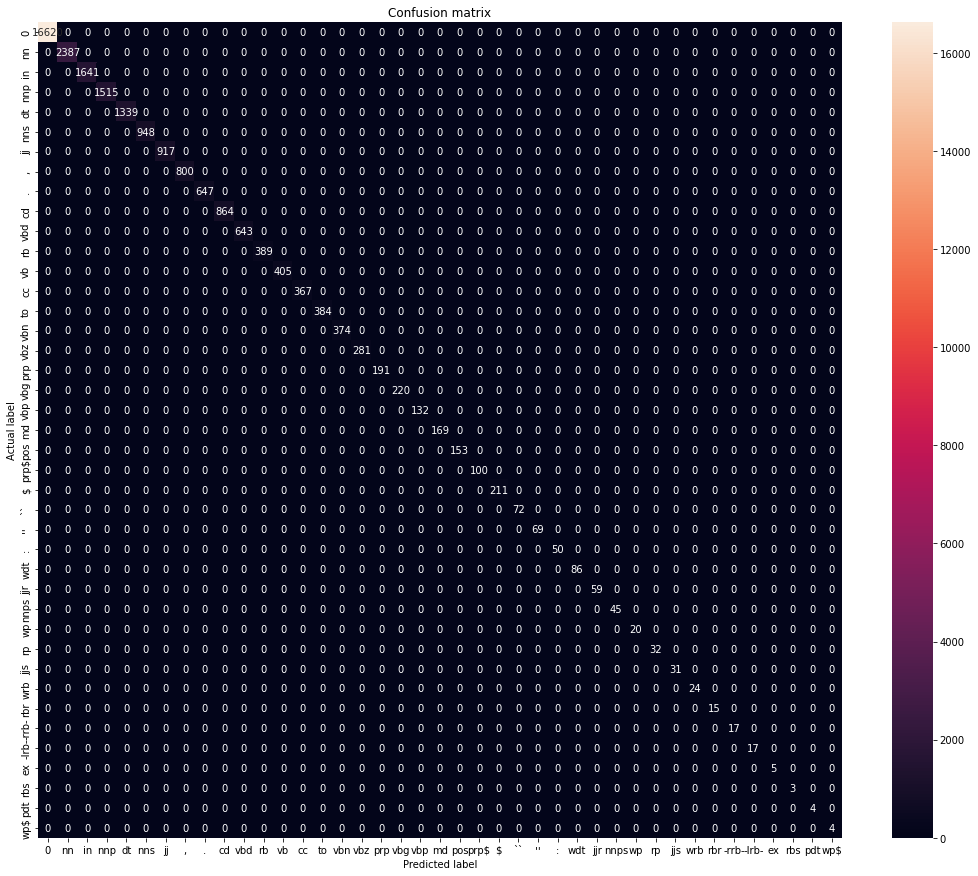

In [66]:
#LSTM Model
plot_cm(y_padded_test.argmax(axis=2).flatten(),predictions_lstm.argmax(axis=2).flatten())

We can see that the classification of the GRU model on the test set is not as accurate as LSTM model, in fact, there are more errors: 43. We can see that the majority of the errors concern the classes: JJ, VBN, RBR, NNS and NNP

Correct Labels:  32203
Sentence length:  13777
Correct Labels (without padding,symbols,punctuation):  13734
Wrong Labels:  43
Padding,symbols,punctuation: 18469


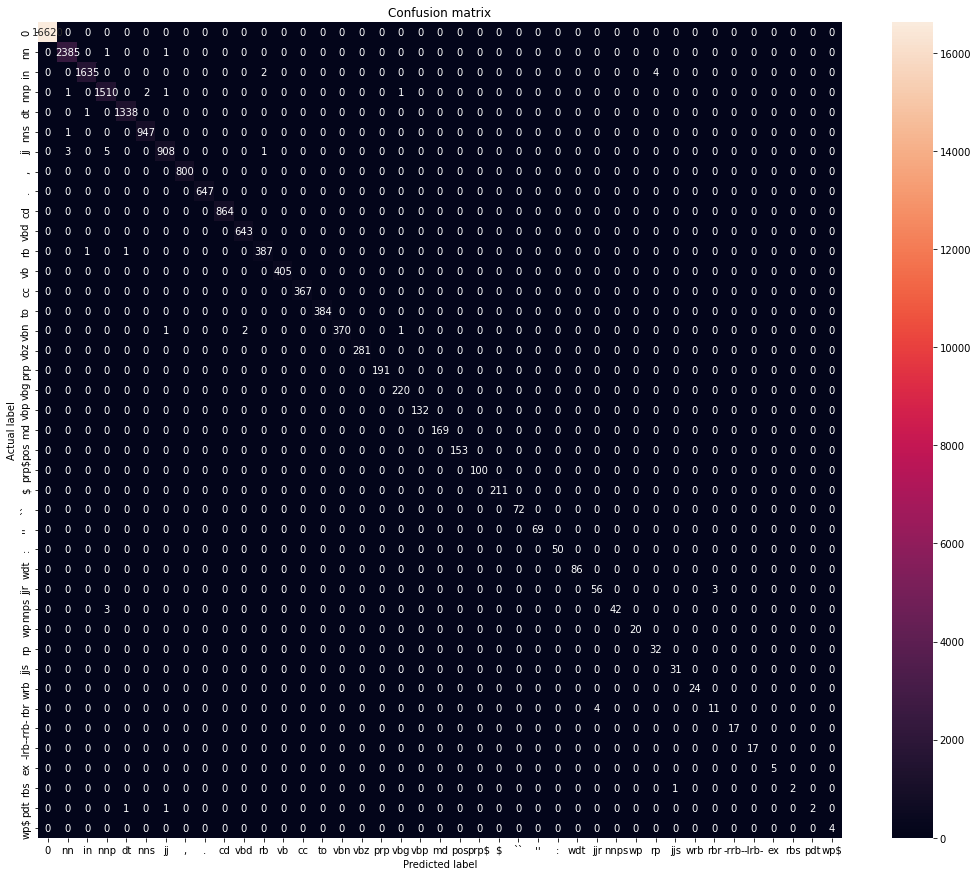

In [67]:
#GRU Model
plot_cm(y_padded_test.argmax(axis=2).flatten(),predictions_gru.argmax(axis=2).flatten())

###Classification Report

In [68]:
def class_report(predictions):
  target_names = ['0','nn','in','nnp','dt','nns','jj',',','.','cd',
                'vbd','rb', 'vb', 'cc', 'to', 'vbn', 'vbz', 'prp', 
                'vbg', 'vbp', 'md', 'pos', 'prp$', '$', '``', "''", 
                ':', 'wdt', 'jjr', 'nnps', 'wp', 'rp', 'jjs', 'wrb', 
                'rbr', '-rrb-', '-lrb-', 'ex', 'rbs', 'pdt', 'wp$']                                                                                                                                                                             
  print(classification_report(y_padded_test.argmax(axis=2).flatten(),predictions.argmax(axis=2).flatten(), target_names=target_names))

We plot the classification report for LSTM model, where we can see that almost all the classes reach 1.00 as precision,recall and f1-score for each class

In [69]:
#LSTM Model
class_report(predictions_lstm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16620
          nn       1.00      1.00      1.00      2387
          in       1.00      1.00      1.00      1641
         nnp       1.00      1.00      1.00      1515
          dt       1.00      1.00      1.00      1339
         nns       1.00      1.00      1.00       948
          jj       1.00      1.00      1.00       917
           ,       1.00      1.00      1.00       800
           .       1.00      1.00      1.00       647
          cd       1.00      1.00      1.00       864
         vbd       1.00      1.00      1.00       643
          rb       1.00      1.00      1.00       389
          vb       1.00      1.00      1.00       405
          cc       1.00      1.00      1.00       367
          to       1.00      1.00      1.00       384
         vbn       1.00      1.00      1.00       374
         vbz       1.00      1.00      1.00       281
         prp       1.00    

We plot the classification report for GRU model, where we can see that the most critics classes to be predected are JJ, RBR, NNP and RP.

In [70]:
#GRU Model
class_report(predictions_gru)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16620
          nn       1.00      1.00      1.00      2387
          in       1.00      1.00      1.00      1641
         nnp       0.99      1.00      1.00      1515
          dt       1.00      1.00      1.00      1339
         nns       1.00      1.00      1.00       948
          jj       1.00      0.99      0.99       917
           ,       1.00      1.00      1.00       800
           .       1.00      1.00      1.00       647
          cd       1.00      1.00      1.00       864
         vbd       1.00      1.00      1.00       643
          rb       0.99      0.99      0.99       389
          vb       1.00      1.00      1.00       405
          cc       1.00      1.00      1.00       367
          to       1.00      1.00      1.00       384
         vbn       1.00      0.99      0.99       374
         vbz       1.00      1.00      1.00       281
         prp       1.00    